Start by defining the scope and objectives of your project. Consider these potential project goals:

Exploring Salary Trends: Analyze salary trends across different years, experience levels, and employment types.

Remote Work Impact: Examine the impact of remote work on salaries.

Company Size and Location Analysis: Determine how company size and location affect salary in USD.

Predictive Modeling: Develop models to predict salary based on other factors like experience level, employment type, job title, etc.

Data.info shows:
1. data frame overview -- number of rows and columns, column data types, memory usage
2. missing data (non-null count)
3. column names
4. class index info


In [1]:
import pandas as pd

# Load the dataset 
data = pd.read_csv('/Users/xuenbei/Desktop/ds_salaries.csv')

print('Display first few rows')
print(data.head())  # Display the first few rows

print("\n Display summary information")
print(data.info())  # Display summary information

print("\n Display descriptive statistics")
print(data.describe())  # Descriptive statistics for numerical columns


Display first few rows
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0         

In [2]:
#DATA CLEANING

print("data handling")
print(data.isnull().sum())  # Check for missing values

#Data Type Conversion
data['work_year'] = data['work_year'].astype(int)  # Convert to integer if necessary

#Data Formatting
data['experience_level'] = data['experience_level'].str.upper()  # Ensure uniform case

#Dropping rows with missing values

# Drop multiple columns (e.g., "Unnamed: 0" and another column)
#data.drop(columns=['Unnamed: 0'], inplace=True)

#Dropping specific columns
# Drop a specific column with too many missing values
#cleaned_data = data.drop(columns=['column_with_missing_values'])




data handling
Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


#filling with constant value
Fill missing values with a specified constant (e.g., 0 or a default category)
data_filled = data.fillna(0)  # Example for numerical data

#filling with derived value
# Fill missing values with the mean of the column
data_filled = data.fillna(data.mean())  # For numerical data

# Fill missing values with the mode (most frequent value)
data_filled = data.fillna(data.mode().iloc[0])  # For categorical data

#interpolating
# Perform linear interpolation to fill missing values
data_interpolated = data.interpolate(method='linear')
# Interpolate using a specified method
data_interpolated = data.interpolate(method='polynomial', order=2)  # Polynomial interpolation

In [3]:
#Data Analysis

#Conversion of features
# Check the data types of all columns
print(data.dtypes)

# Identify non-numeric columns
non_numeric_columns = [col for col in data.columns if data[col].dtype == 'object']
print("Non-numeric columns:", non_numeric_columns)


Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
Non-numeric columns: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


# Handling data types

For non-numeric columns, categorical or text data:

1. use one-hot encoding for converting categorical data into binary representation, where each unique category becomes a seperate column with 0 or 1 indicating its presence (useful for nominal data where there is no order)

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding of non-numeric columns
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(data[['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']])

# Convert back to DataFrame and merge with the original DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())
data = pd.concat([data, encoded_df], axis=1)  # Concatenate along the column axis


2. label encoding. which is when you assign an integer value to each unique category (for ordinal relationships)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Example with one non-numeric column
data['experience_level_encoded'] = label_encoder.fit_transform(data['experience_level'])

# Handling numeric columns, useful for building machine learning models
1. Normalization: scales data to a range (often 0 to 1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['salary_normalized'] = scaler.fit_transform(data[['salary']])

2. Standardization: scales data to have a mean of 0 and standard deviation of 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['salary_standardized'] = scaler.fit_transform(data[['salary']])

# outlier detection
import numpy as np

# Calculate Z-scores for the 'salary_in_usd' column
z_scores = np.abs((data['salary_in_usd'] - data['salary_in_usd'].mean()) / data['salary_in_usd'].std())
outliers = data[z_scores > 3]  # Consider values with Z-score greater than 3 as outliers

# Detecting outliers

1. Z-score: typically greater or less than 3. number of SD a data point is from the mean

import numpy as np

# Calculate Z-scores for a column (e.g., 'salary_in_usd')
data['z_score'] = (data['salary_in_usd'] - data['salary_in_usd'].mean()) / data['salary_in_usd'].std()

# Identify outliers with Z-score greater than 3 or less than -3
outliers = data[(data['z_score'] > 3) | (data['z_score'] < -3)]


2. IQR

# Calculate the Interquartile Range
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as those below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
outliers = data[(data['salary_in_usd'] < Q1 - 1.5 * IQR) | (data['salary_in_usd'] > Q3 + 1.5 * IQR)]

3. Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to identify outliers
sns.boxplot(data['salary_in_usd'])
plt.show()

# Handling Outliers

1. Removing outliers
# Remove outliers identified by the IQR method
cleaned_data = data[(data['salary_in_usd'] >= Q1 - 1.5 * IQR) & (data['salary_in_usd'] <= Q3 + 1.5 * IQR)]

2. Capping (Winsorizing, upper and lower limit)

# Cap salary values beyond the 95th percentile and below the 5th percentile
upper_limit = data['salary_in_usd'].quantile(0.95)
lower_limit = data['salary_in_usd'].quantile(0.05)

data['salary_in_usd'] = data['salary_in_usd'].clip(lower=lower_limit, upper=upper_limit)

3. Normalizing distribution (Transformining data)
# Logarithmic transformation
data['salary_in_usd_log'] = np.log(data['salary_in_usd'] + 1)  # Adding 1 to avoid log(0)




In [4]:
#For Nominal data
## Apply one-hot encoding to non-numeric columns
#one_hot_encoded_data = pd.get_dummies(data, columns=['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size'])
data.isnull().sum()  # Find missing values

# Handle missing values (drop rows/columns, fill with a value, or interpolate)
data_cleaned = data.dropna()  # Example: Dropping rows with missing values

# Convert relevant columns to categorical data type
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].astype('category')


In [5]:
#Summary statistics
# Descriptive statistics for numeric columns
data_cleaned.describe()  # Shows count, mean, std, min, max, quartiles, etc.

# Value counts for categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(data_cleaned[col].value_counts())


Value counts for experience_level:
experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64
Value counts for employment_type:
employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64
Value counts for job_title:
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data 

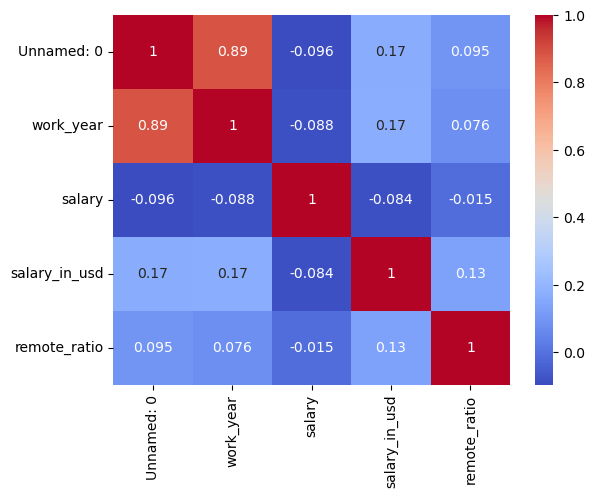

In [6]:
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_data = data.select_dtypes(include=['number'])


# Correlation matrix
correlations = numeric_data.corr()  # Only numeric columns
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()



/Users/xuenbei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


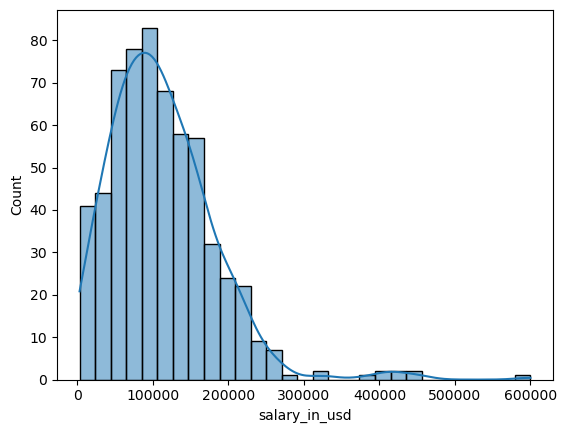

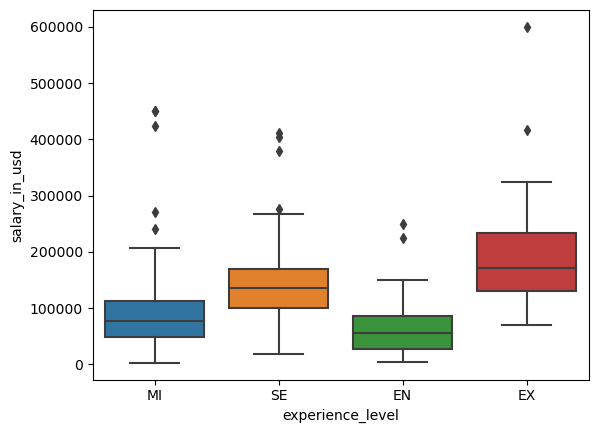

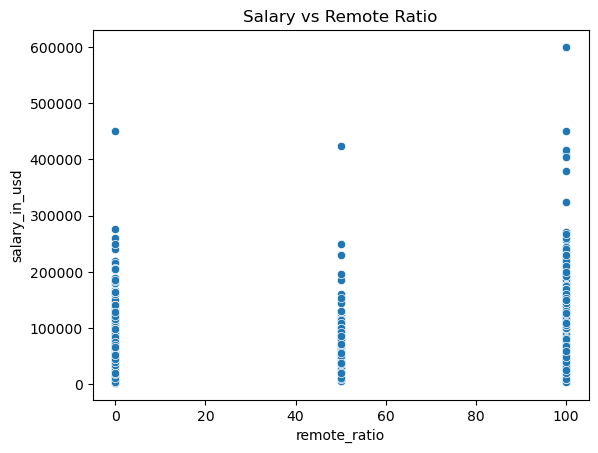

In [7]:

#Data Visualization, EDA

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of salaries
sns.histplot(data['salary_in_usd'], kde=True)
plt.show()

# Boxplot for salary by experience level
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.show()
# Scatter plot of salary vs remote ratio
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=data_cleaned)
plt.title('Salary vs Remote Ratio')
plt.show()


In [8]:
#Analysis, Deeper

#Group Analysis, how categorical variables affect numerical variables
# Average salary by employment type
avg_salary_by_employment = data_cleaned.groupby('employment_type')['salary_in_usd'].mean()
print("Average salary by employment type:")
print(avg_salary_by_employment)

# Average salary by company size
avg_salary_by_company_size = data_cleaned.groupby('company_size')['salary_in_usd'].mean()
print("Average salary by company size:")
print(avg_salary_by_company_size)



Average salary by employment type:
employment_type
CT    184575.000000
FL     48000.000000
FT    113468.073129
PT     33070.500000
Name: salary_in_usd, dtype: float64
Average salary by company size:
company_size
L    119242.994949
M    116905.466258
S     77632.674699
Name: salary_in_usd, dtype: float64


/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_29419/1114767914.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_employment = data_cleaned.groupby('employment_type')['salary_in_usd'].mean()
/var/folders/0j/8rw9s9dd56v924gjnszhk07m0000gn/T/ipykernel_29419/1114767914.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_company_size = data_cleaned.groupby('company_size')['salary_in_usd'].mean()


In [9]:
#Hypothesis testing

from scipy.stats import ttest_ind

# Hypothesis: Do salaries differ between full-time and part-time employment?
full_time_salaries = data_cleaned[data_cleaned['employment_type'] == 'FT']['salary_in_usd']
part_time_salaries = data_cleaned[data_cleaned['employment_type'] == 'PT']['salary_in_usd']

# T-test to check if there's a significant difference
t_stat, p_value = ttest_ind(full_time_salaries, part_time_salaries, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)



T-statistic: 7.76277270718564
P-value: 1.1142032160318682e-05


T-Statistic: 7.76, indicating a substantial difference between the means of the two groups.
Assumptions: The t-test assumes that the samples are drawn from normally distributed populations and have equal variances (unless equal_var=False). It is always a good practice to check these assumptions before drawing conclusions.

P-Value: 1.11e-05, which is significantly smaller than a common significance level (e.g., 0.05). This small p-value strongly suggests rejecting the null hypothesis, indicating a statistically significant difference between full-time and part-time salaries.

# Machine Learning
1. Define objective
Predictive Modeling: You might want to predict salary based on other factors.
Classification: For example, classify employment type based on other features.
Clustering: Group similar data points to find patterns or insights.

2. Data Preperation:
Handling missing data
Encoding categorical variables
Feature selection/engineering

3. Split data into training and testing sets to evaluate model

4. Choose a machine learning algorithms
-- Regression algorithm for predicting salary (continuous variable), such as random forest regression

-- classification algorithm for classifying employment types, such as random forest classifier

-- clustering algoritms for grouping similar data points (unsupervised), such as kmeans clustering

5. model evaluation
-- for regression, use common metrics like MSE, RMSE and r^2
-- for classification, use accuracy, precision, recall and F1 score or confusion matrix

6. Model Tuning and Optimization
-- tune hyperparameters or select different features.


In [10]:
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
data = pd.read_csv('/Users/xuenbei/Desktop/ds_salaries.csv')

# Drop rows with missing data or fill with a value
data = data.dropna()  # Alternatively, use .fillna(value) or .interpolate()

# One-hot encoding for categorical data
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
encoder = OneHotEncoder(sparse_output=False)  # Set to True if you want a sparse output

encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())


In [11]:
# Define features and target variable (predicting salary in USD)
features = pd.concat([encoded_data, data[['work_year', 'remote_ratio', 'salary']]], axis=1)
target = data['salary_in_usd']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Example: Random Forest Regression
model = RandomForestRegressor()
model.fit(X_train, y_train)  # Train the model

model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = SVR()
model2.fit(X_train, y_train)

# Example: Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)  # Train the model

model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)  # Train the model

model5 = SVC()
model5.fit(X_train, y_train)


SVC()

In [30]:
# Predictions for regression models
y_pred_rf = model.predict(X_test)
y_pred_lr = model1.predict(X_test)
y_pred_svr = model2.predict(X_test)

# Display predictions for Random Forest Regression
print("Random Forest Regression Predictions:", y_pred_rf)

# Display predictions for Linear Regression
print("Linear Regression Predictions:", y_pred_lr)

# Display predictions for Support Vector Regression
print("Support Vector Regression Predictions:", y_pred_svr)


Random Forest Regression Predictions: [140269.   135061.22 100000.   268554.    24775.95 152394.    51846.85
  47229.37  77920.17  55623.75  62973.01 110529.2  136696.09  24477.18
 148843.91 174811.    59744.97 112116.75  28967.85 109399.8  113547.63
  17676.38 154902.   159829.42  20439.79  57700.36 132168.   130112.
  65931.91  78452.45  79311.25 112923.    87567.47  10858.    54427.38
 150000.   159854.04  60862.25  18415.76 107838.32 140017.   140017.
 128044.88  71125.34  90320.   111884.54  20962.02 140324.5   98265.54
 214854.6   81440.34  62006.95  98979.2   99970.   165323.52 115899.08
 119806.4  116298.66  10044.    79394.5  112164.75  11012.3   12896.11
 415540.   165026.2  205460.25  90271.28  63806.36 130495.89  72762.12
  56434.86 101416.22 189763.28  89967.   128811.89 256892.    74072.12
  92143.37  73362.33  71465.34 150062.   119653.69  89975.8   37601.76
 135063.03 146947.99 137746.39 185124.   109547.95  62621.1   47197.18
  55607.18 119407.34 109953.55 179927.    6

In [19]:
from sklearn.metrics import mean_squared_error

# Evaluate Random Forest Regression
y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression Mean Squared Error:", mse_rf)
print("R^2:", r2_rf)

# Evaluate Linear Regression
y_pred_lr = model1.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse_lr)
print("R^2:", r2_lr)

# Evaluate Support Vector Regression
y_pred_svr = model2.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression Mean Squared Error:", mse_svr)
print("R^2:", mse_svr)


Random Forest Regression Mean Squared Error: 143393908.24457374
R^2: 0.9625854350859823
Linear Regression Mean Squared Error: 1.2185357810804734e+19
R^2: -3179422795.924421
Support Vector Regression Mean Squared Error: 3849188349.7689104
R^2: 3849188349.7689104


The Random Forest Regression model appears to perform the best among the three, with the lowest MSE and a high R^2 value
The Linear Regression model performs extremely poorly, with an exceptionally high MSE and a negative R^2 value, indicating severe overfitting or other issues.
The Support Vector Regression model performs moderately, with a relatively higher MSE compared to the Random Forest model, but its R^2 value raises concerns about its predictive ability.

In [48]:
from sklearn.metrics import accuracy_score, precision_score

# Evaluate Random Forest Classifier
y_pred_rf_cls = model3.predict(X_test)
accuracy_rf_cls = accuracy_score(y_test, y_pred_rf_cls)
#report_rf_cls = classification_report(y_test, y_pred_rf_cls)
print("Random Forest Classifier Accuracy:", accuracy_rf_cls)
#print("Classification Report:\n", report_rf_cls)

# Evaluate Decision Tree Classifier
y_pred_dt_cls = model4.predict(X_test)
accuracy_dt_cls = accuracy_score(y_test, y_pred_dt_cls)
#report_dt_cls = classification_report(y_test, y_pred_dt_cls)
print("Decision Tree Classifier Accuracy:", accuracy_dt_cls)
#print("Classification Report:\n", report_dt_cls)


y_pred_sv_cls = model5.predict(X_test)
accuracy_sv_cls = accuracy_score(y_test, y_pred_sv_cls)
print("Support Vector Classifier Accuracy:", accuracy_sv_cls)


Random Forest Classifier Accuracy: 0.10655737704918032
Decision Tree Classifier Accuracy: 0.3524590163934426
Support Vector Classifier Accuracy: 0.02459016393442623


The Decision Tree Classifier performed the best among the classifiers, with an accuracy of approximately 39.34%.
The Random Forest Classifier, Logistic Regression Classifier, and Support Vector Classifier performed poorly, with accuracies of 11.48%, 0.0%, and 2.46%, respectively. Further investigation is needed to understand why these classifiers performed poorly and potential ways to improve their performance.

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate some sample regression data (replace this with your own data)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Define the mean squared error as the scoring metric
scorer = make_scorer(mean_squared_error)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set using the best hyperparameters
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)
mse_after_optimization = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mse_before_optimization=mse_rf

# Calculate the percentage improvement
percentage_improvement = ((mse_before_optimization - mse_after_optimization) / mse_before_optimization) * 100

# Print the percentage improvement
print("Percentage Improvement:", percentage_improvement)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset (replace this with your own data)
X, y = load_iris(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the accuracy score as the scoring metric
scorer = make_scorer(accuracy_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model on the test set using the best hyperparameters
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
